# 갭마인더 데이터 집합 불러오기

In [ ]:
import pandas as pd #pandas 불러오기(pd로)
df=pd.read_csv('../data/gapminder.tsv',sep='\t') #gapminder라는 데이터셋 불러옴, df라는 이름으로.

# 불러온 데이터 집합 살펴보기

In [ ]:
 print(df) #행 1704개, 열 6개

          country continent  year  lifeExp       pop   gdpPercap
0     Afghanistan      Asia  1952   28.801   8425333  779.445314
1     Afghanistan      Asia  1957   30.332   9240934  820.853030
2     Afghanistan      Asia  1962   31.997  10267083  853.100710
3     Afghanistan      Asia  1967   34.020  11537966  836.197138
4     Afghanistan      Asia  1972   36.088  13079460  739.981106
...           ...       ...   ...      ...       ...         ...
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298

[1704 rows x 6 columns]


In [ ]:
print(df.head()) #첫 5행 출력

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106


In [ ]:
print(type(df)) #자료형 출력

<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(df.shape) #데이터프레임의 (행,열) 값 출력/shape는 메서드가 아닌 "속성값"임을 기억하기.

(1704, 6)


In [ ]:
print(df.columns) #shape와 마찬가지로 속성. 데이터프레임의 열 이름 출력.

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')


In [ ]:
print(df.dtypes) #데이터프레임을 구성하는 '값'의 자료형 출력.

print(df.info()) #마찬가지. 좀 더 자세한 내용 확인 가능.//object=string(문자열),int64=int(정수),float64=float(소수점을 가진 숫자),datetime64=datetime(파이썬 표준 라이브러리인 datetime이 반환하는 자료형)

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB
None


# 열 단위로 데이터 추출하기

In [ ]:
country_df=df['country'] #열 단위 추출 방법:대괄호와 열 이름 사용.
print(type(country_df)) #결과는 series라고 뜸.
print(country_df.head())
print(country_df.tail())

<class 'pandas.core.series.Series'>
0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object
1699    Zimbabwe
1700    Zimbabwe
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object


In [ ]:
subset=df[['country','continent','year']] #리스트에 열이름 전달 -> 여러 열 한 번에 추출 가능.
print(type(subset)) #여러 열을 추출하기 때문에 시리즈가 아닌 데이터프레임으로 출력.
print(subset.head())
print(subset.tail())

<class 'pandas.core.frame.DataFrame'>
       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972
       country continent  year
1699  Zimbabwe    Africa  1987
1700  Zimbabwe    Africa  1992
1701  Zimbabwe    Africa  1997
1702  Zimbabwe    Africa  2002
1703  Zimbabwe    Africa  2007


# loc 속성으로 행 단위 데이터 추출하기

In [ ]:
#loc:인덱스 기준으로 행 데이터 추출/iloc:행 번호 기준으로 행 데이터 추출
print(df.loc[0]) #판다스에서 인덱스:행 번호와 유사개념. 즉 인덱스가 0인 행 추출.
print(df.loc[99])
print(df.loc[-1]) #없는 행이므로 오류 발생

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap     779.445314
Name: 0, dtype: object
country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap    721.186086
Name: 99, dtype: object


KeyError: -1

In [ ]:
number_of_rows=df.shape[0]#'df.shape의' 0번째 인덱스. 즉 (1704,6)에서 1704.
last_row_index=number_of_rows-1
print(df.loc[last_row_index]) #마지막 행 데이터가 출력됨.

In [ ]:
print(df.tail(n=1))
print(df.tail(n=2)) #인자 n에 2 전달 시 2개 데이터 추출 가능.

In [ ]:
print(df.loc[[0,99,999]]) #인덱스가 0,99,999인 데이터들 한번에 추출. 반드시 리스트에 인덱스 담아서 전달해야함!!

# tail과 loc는 조금 달라요!

In [ ]:
subset_loc=df.loc[0]
subset_tail=df.tail(n=1)
print(type(subset_loc)) #loc 속성은 시리즈를 반납함.
print(type(subset_tail)) #tail 속성은 데이터프레임을 반납함.

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


# iloc 속성으로 행 단위 데이터 추출하기

In [ ]:
print(df.iloc[1]) #인덱스를 사용하는 loc 속성과 다르게 iloc은 '데이터 순서'를 의미하는 행 번호를 사용하는 것. 둘은 유사하나 의미 상 차이가 있음.
print(df.iloc[99])

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap      820.85303
Name: 1, dtype: object
country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap    721.186086
Name: 99, dtype: object


In [ ]:
print(df.iloc[-1]) #loc과 다른 점. 음수 사용가능. -1은 마지막 행 데이터를 의미함.
print(df.iloc[1710]) #그러나 데이터프레임에 아예 존재하지 않는 행번호 전달 시 오류 발생.

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object


IndexError: single positional indexer is out-of-bounds

In [ ]:
print(df.iloc[[0,99,999]]) #loc과 마찬가지로 여러데이터 추출가능. 리스트에 담아 전달하는 것 잊지 말기.

         country continent  year  lifeExp       pop    gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333   779.445314
99    Bangladesh      Asia  1967   43.453  62821884   721.186086
999     Mongolia      Asia  1967   51.253   1149500  1226.041130


# 파이썬 슬라이싱 구문을 조합하여 원하는 데이터 추출하기

In [ ]:
subset=df.loc[:, ['year','pop']] #:는 모든 행 의미, loc은 열 지정값(리스트)안에 반드시 문자열로 전달.
print(subset.head())
subset=df.iloc[:, [2,4,-1]] #모든 행에 대하여 3열,5열,마지막열.
print(subset.head())

   year       pop
0  1952   8425333
1  1957   9240934
2  1962  10267083
3  1967  11537966
4  1972  13079460
   year       pop   gdpPercap
0  1952   8425333  779.445314
1  1957   9240934  820.853030
2  1962  10267083  853.100710
3  1967  11537966  836.197138
4  1972  13079460  739.981106


# iloc 속성과 range 메서드로 원하는 데이터 추출하기

In [ ]:
small_range=list(range(5))
print(small_range)
print(type(small_range))

[0, 1, 2, 3, 4]
<class 'list'>


In [ ]:
subset=df.iloc[:,small_range] #모든 행에 대해 0~4열 출력
print(subset.head())

       country continent  year  lifeExp       pop
0  Afghanistan      Asia  1952   28.801   8425333
1  Afghanistan      Asia  1957   30.332   9240934
2  Afghanistan      Asia  1962   31.997  10267083
3  Afghanistan      Asia  1967   34.020  11537966
4  Afghanistan      Asia  1972   36.088  13079460


In [ ]:
small_range=list(range(3,6))
print(small_range)
subset=df.iloc[:,small_range] #모든 행에 대하여 4~6열 출력.
print(subset.head())

[3, 4, 5]
   lifeExp       pop   gdpPercap
0   28.801   8425333  779.445314
1   30.332   9240934  820.853030
2   31.997  10267083  853.100710
3   34.020  11537966  836.197138
4   36.088  13079460  739.981106


In [ ]:
small_range=list(range(0,6,2)) #0~5까지 2만큼 건너뜀. 즉 짝수.
subset=df.iloc[:, small_range]
print(subset.head())

       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460


# 열 지정값에 파이썬 슬라이싱을 사용하여 원하는 데이터 추출하기

In [ ]:
subset=df.iloc[:, :3] #모든 행에 대하여 0~2열/실무에서는 range보다 슬라이싱을 더 많이 씀.
print(subset.head())

       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972


In [ ]:
subset=df.iloc[:,0:6:2] #range(0,6,2)한 것과 동일 결과.
print(subset.head())

       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460


# loc, iloc 자유자재로 사용하기

In [ ]:
print(df.iloc[[0,99,999],[0,3,5]]) #0,99,999번째 행의 0,3,5번째 열 추출
print(df.loc[[0,99,999],['country','lifeExp','gdpPercap']]) #마찬가지. loc속성은 정수리스트가 아닌 열이름으로 전달. 따라서 어떤 데이터를 추출했는지 좀 더 쉽게 파악 가능.

         country  lifeExp    gdpPercap
0    Afghanistan   28.801   779.445314
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130
         country  lifeExp    gdpPercap
0    Afghanistan   28.801   779.445314
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130


In [ ]:
print(df.loc[10:13, ['country','lifeExp','gdpPercap']]) #10:13은 인덱스 번호이지 행번호가 아님. 착각하지 않기

        country  lifeExp    gdpPercap
10  Afghanistan   42.129   726.734055
11  Afghanistan   43.828   974.580338
12      Albania   55.230  1601.056136
13      Albania   59.280  1942.284244


# 그룹화한 데이터의 평균 구하기

In [ ]:
print(df.head(n=10))

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106
5  Afghanistan      Asia  1977   38.438  14880372  786.113360
6  Afghanistan      Asia  1982   39.854  12881816  978.011439
7  Afghanistan      Asia  1987   40.822  13867957  852.395945
8  Afghanistan      Asia  1992   41.674  16317921  649.341395
9  Afghanistan      Asia  1997   41.763  22227415  635.341351


In [ ]:
print(df.groupby('year')['lifeExp'].mean()) #데이터를 year열로 그룹화 후 lifeExp열의 평균 출력.

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [ ]:
grouped_year_df=df.groupby('year')
print(type(grouped_year_df)) #그룹화한 데이터의 자료형은 DataFrameGroupBy임.
print(grouped_year_df) #그룹화한 데이터는 0x00...에 저장되어 있음

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [ ]:
grouped_year_df_lifeExp=grouped_year_df['lifeExp'] #연도별로 그룹화한 데이터프레임에서 lifeExp열 추출
print(type(grouped_year_df_lifeExp)) #그룹화한 시리즈.

<class 'pandas.core.groupby.generic.SeriesGroupBy'>


In [ ]:
mean_lifeExp_by_year=grouped_year_df_lifeExp.mean()
print(mean_lifeExp_by_year)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [ ]:
multi_group_var=df.groupby(['year','continent'])[['lifeExp','gdpPercap']].mean()
print(multi_group_var)

                  lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699


In [ ]:
print(type(multi_group_var)) #타입은 데이터프레임.

<class 'pandas.core.frame.DataFrame'>


# 그룹화한 데이터의 개수 세어보기

In [ ]:
print(df.groupby('continent')['country'].nunique()) #nunique는 데이터의 빈도수를 구하는 메서드.

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64


# 그래프 만들기

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
global_yearly_life_expectancy=df.groupby('year')['lifeExp'].mean()
print(global_yearly_life_expectancy)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


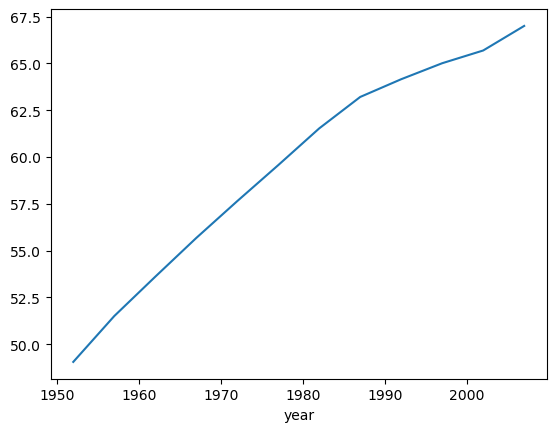

In [ ]:
global_yearly_life_expectancy.plot()
plt.show()

# 시리즈 만들기

In [ ]:
import pandas as pd
s=pd.Series(['banana',42]) #시리즈 메서드에 리스트 전달할 경우 시리즈를 생성할 수 있음.(한 열)
print(s)

0    banana
1        42
dtype: object


In [ ]:
s=pd.Series(['Wes Mckinney','Creator of Pandas'])
print(s)
s=pd.Series(['Wes Mckinney','Creator of Pandas'], index=['Person','Who']) #문자열을 인덱스로 지정.
print(s)

0         Wes Mckinney
1    Creator of Pandas
dtype: object
Person         Wes Mckinney
Who       Creator of Pandas
dtype: object


# 데이터프레임 만들기

In [ ]:
scientists=pd.DataFrame({
    'Name':['Rosaline Franklin', 'William Gosset'],
    'Occupation':['Chemist', 'Statistician'],
    'Born':['1920-07-25', '1876-06-13'],
    'Died':['1958-04-16', '1937-10-16'],
    'Age':[37,61]} #딕셔너리와 같은 형태로 DataFrame 메서트에 전달해야함. (value형태에는 리스트로 전달. 중괄호 잊지말기)
                       )
print(scientists)

                Name    Occupation        Born        Died  Age
0  Rosaline Franklin       Chemist  1920-07-25  1958-04-16   37
1     William Gosset  Statistician  1876-06-13  1937-10-16   61


In [ ]:
scientists=pd.DataFrame(
    data={'Occupation':['Chemist', 'Statistician'],
          'Born':['1920-07-25', '1876-06-13'],
          'Died':['1958-04-16', '1937-10-16'],
          'Age':[37,61]},
    index=['Rosaline Franklin', 'William Gosset'], #시리즈에서와 마찬가지로 인덱스 설정. 항상 리스트 형태로 전달함을 조심하기.
    columns=['Occupation','Born','Age','Died'] #columns 인자에 들어가는 순서대로 열 순서 지정됨.
                       )
print(scientists)

                     Occupation        Born  Age        Died
Rosaline Franklin       Chemist  1920-07-25   37  1958-04-16
William Gosset     Statistician  1876-06-13   61  1937-10-16


In [ ]:
from collections import OrderedDict #딕셔너리는 키와 값으로 이루어진 한 쌍의 데이터들의 순서는 보장하지 않음. 그러나 OrderedDict를 사용하면 데이터 순서 그대로 유지가능.

scientists=pd.DataFrame(OrderedDict([
    ('Name',['Rosaline Franklin', 'William Gosset']),
    ('Occupation',['Chemist','Statistician']),
    ('Born',['1920-07-25','1876-06-13']),
    ('Died',['1958-04-16','1937-10-16']),
    ('Age',[37,61])
])
                       )
print(scientists)

                Name    Occupation        Born        Died  Age
0  Rosaline Franklin       Chemist  1920-07-25  1958-04-16   37
1     William Gosset  Statistician  1876-06-13  1937-10-16   61


# 데이터프레임에서 시리즈 선택하기

In [ ]:
scientists=pd.DataFrame(
    data={'Occupation':['Chemist', 'Statistician'],
          'Born':['1920-07-25', '1876-06-13'],
          'Died':['1958-04-16', '1937-10-16'],
          'Age':[37,61]},
    index=['Rosaline Franklin', 'William Gosset'], 
    columns=['Occupation','Born','Age','Died'] 
                       )
print(scientists)

first_row=scientists.loc['William Gosset'] #데이터프레임에서 시리즈 선택하려면 loc속성에 인덱스 전달하면 됨.
print(type(first_row))

print(first_row) #Age열에 정수형 리스트가 있어도, 이 자료형은 무시되고 object로 인식됨.

                     Occupation        Born  Age        Died
Rosaline Franklin       Chemist  1920-07-25   37  1958-04-16
William Gosset     Statistician  1876-06-13   61  1937-10-16
<class 'pandas.core.series.Series'>
Occupation    Statistician
Born            1876-06-13
Age                     61
Died            1937-10-16
Name: William Gosset, dtype: object


# index, values, keys 사용하기

In [ ]:
print(first_row.index) #시리즈의 인덱스가 저장되어 있음. index는 속성임.

Index(['Occupation', 'Born', 'Age', 'Died'], dtype='object')


In [ ]:
print(first_row.values) #시리즈의 데이터가 저장되어 있음. values는 속성임.

['Statistician' '1876-06-13' 61 '1937-10-16']


In [ ]:
print(first_row.keys()) #index속성과 정확히 같은 역할을 함. 그러나 keys는 메서드임!

Index(['Occupation', 'Born', 'Age', 'Died'], dtype='object')


In [ ]:
print(first_row.index[0])
print(first_row.keys()[0])

Occupation
Occupation


# 시리즈의 mean, min, max, std 메서드 사용하기

In [ ]:
ages=scientists['Age']
print(ages)

print(ages.mean()) #mean, min, max, std는 모두 메서드임!
print(ages.min())
print(ages.max())
print(ages.std()) 

#append-2개이상의 시리즈 연결/describe-요약 통계량 계산/drop_duplicates-중복값이 없는 시리즈 반환/equals-시리즈에 해당 값을 가진 요소가 있는지 확인
#get_values-시리즈 값 구하기(values 속성과 동일)/isin-시리즈에 포함된 값이 있는지 확인/min-최솟값 반환/max-최댓값 반환/mean-산술평균반환
#median-중간값 반환/replace-특정 값을 가진 시리즈 교체/sample-시리즈에서 임의의 값 반환/sort_values-값을 정렬/to_frame-시리즈를 데이터프레임으로 변환


Rosaline Franklin    37
William Gosset       61
Name: Age, dtype: int64
49.0
37
61
16.97056274847714


# 시리즈와 불린 추출 사용하기

In [ ]:
#불린추출은 데이터의 정확한 인덱스 값을 모를 때 사용. 특정 조건을 만족하는 값만 추출할 수 있음.

scientists=pd.read_csv('../data/scientists.csv')
print(scientists)

ages=scientists['Age']
print(ages.max())
print(ages.mean())

                   Name        Born        Died  Age          Occupation
0     Rosaline Franklin  1920-07-25  1958-04-16   37             Chemist
1        William Gosset  1876-06-13  1937-10-16   61        Statistician
2  Florence Nightingale  1820-05-12  1910-08-13   90               Nurse
3           Marie Curie  1867-11-07  1934-07-04   66             Chemist
4         Rachel Carson  1907-05-27  1964-04-14   56           Biologist
5             John Snow  1813-03-15  1858-06-16   45           Physician
6           Alan Turing  1912-06-23  1954-06-07   41  Computer Scientist
7          Johann Gauss  1777-04-30  1855-02-23   77       Mathematician
90
59.125


In [ ]:
print(ages[ages>ages.mean()]) #불린 추출을 사용해 평균나이보다 나이가 많은 사람의 데이터 추출.

print(ages>ages.mean()) #여기서 True값이 나온 데이터들만 추출.
print(type(ages>ages.mean()))

manual_bool_values=[True,True,False,False,True,True,False,True]
print(ages[manual_bool_values])

1    61
2    90
3    66
7    77
Name: Age, dtype: int64
0    False
1     True
2     True
3     True
4    False
5    False
6    False
7     True
Name: Age, dtype: bool
<class 'pandas.core.series.Series'>
0    37
1    61
4    56
5    45
7    77
Name: Age, dtype: int64


# 시리즈와 브로드캐스팅

In [ ]:
#브로드캐스팅:모든 데이터에 대해 한 번에 연산하는 것
#벡터:시리즈처럼 여러개의 값을 가진 데이터
#스칼라:단순 크기를 나타내는 데이터

print(ages+ages) #같은 길이의 벡터로 연산. 결과값도 같은 길이의 벡터
print(ages*ages)
print(ages+100) #100은 스칼라. 벡터의 모든 값에 스칼라인 100을 적용하여 브로드캐스팅함.
print(ages*2)

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64
0    1369
1    3721
2    8100
3    4356
4    3136
5    2025
6    1681
7    5929
Name: Age, dtype: int64
0    137
1    161
2    190
3    166
4    156
5    145
6    141
7    177
Name: Age, dtype: int64
0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64


In [ ]:
print(pd.Series([1, 100])) #시리즈 만드는 방법이었음!
print(ages+pd.Series([1, 100])) #길이가 서로 다른 벡터일 경우 같은 인덱스의 값만 계산하게 됨.

0      1
1    100
dtype: int64
0     38.0
1    161.0
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
dtype: float64


In [ ]:
rev_ages=ages.sort_index(ascending=False) #데이터의 역순이 아니라, 인덱스의 역순으로 정렬됨!
print(rev_ages)

7    77
6    41
5    45
4    56
3    66
2    90
1    61
0    37
Name: Age, dtype: int64


In [ ]:
print(ages*2)
print(ages+rev_ages) #둘이 완전히 같은 결과. ages데이터와 rev_ages의 데이터를 순서대로 더하는 것이 아니라, 인덱스가 일치하는 값끼리 브로드캐스팅함.
#벡터와 벡터의 연산은 '일치하는 인덱스의 값'끼리 수행한다는 것 잊지말기!!!

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64
0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64


# 데이터프레임과 불린 추출

In [ ]:
print(scientists[scientists['Age']>scientists['Age'].mean()]) #불린 추출 한것임.

                   Name        Born        Died  Age     Occupation
1        William Gosset  1876-06-13  1937-10-16   61   Statistician
2  Florence Nightingale  1820-05-12  1910-08-13   90          Nurse
3           Marie Curie  1867-11-07  1934-07-04   66        Chemist
7          Johann Gauss  1777-04-30  1855-02-23   77  Mathematician


In [ ]:
print(scientists.loc[[True,True,False,True,False,False,False,False]]) #길이가 4인 불 벡터 전달 시 오류???

                Name        Born        Died  Age    Occupation
0  Rosaline Franklin  1920-07-25  1958-04-16   37       Chemist
1     William Gosset  1876-06-13  1937-10-16   61  Statistician
3        Marie Curie  1867-11-07  1934-07-04   66       Chemist


# 데이터프레임과 브로드캐스팅

In [ ]:
print(scientists*2) #정수데이터는 2를 곱한 숫자, 문자 데이터는 문자열이 2배로 늘어나게 됨.

                                       Name                  Born  \
0        Rosaline FranklinRosaline Franklin  1920-07-251920-07-25   
1              William GossetWilliam Gosset  1876-06-131876-06-13   
2  Florence NightingaleFlorence Nightingale  1820-05-121820-05-12   
3                    Marie CurieMarie Curie  1867-11-071867-11-07   
4                Rachel CarsonRachel Carson  1907-05-271907-05-27   
5                        John SnowJohn Snow  1813-03-151813-03-15   
6                    Alan TuringAlan Turing  1912-06-231912-06-23   
7                  Johann GaussJohann Gauss  1777-04-301777-04-30   

                   Died  Age                            Occupation  
0  1958-04-161958-04-16   74                        ChemistChemist  
1  1937-10-161937-10-16  122              StatisticianStatistician  
2  1910-08-131910-08-13  180                            NurseNurse  
3  1934-07-041934-07-04  132                        ChemistChemist  
4  1964-04-141964-04-14  112     

# 열의 자료형 바꾸기와 새로운 열 추가하기

In [ ]:
print(scientists['Born'].dtype) #각각의 자료형은 문자열(오브젝트)임.
print(scientists['Died'].dtype)
print(scientists)

object
object
                   Name        Born        Died  Age          Occupation
0     Rosaline Franklin  1920-07-25  1958-04-16   37             Chemist
1        William Gosset  1876-06-13  1937-10-16   61        Statistician
2  Florence Nightingale  1820-05-12  1910-08-13   90               Nurse
3           Marie Curie  1867-11-07  1934-07-04   66             Chemist
4         Rachel Carson  1907-05-27  1964-04-14   56           Biologist
5             John Snow  1813-03-15  1858-06-16   45           Physician
6           Alan Turing  1912-06-23  1954-06-07   41  Computer Scientist
7          Johann Gauss  1777-04-30  1855-02-23   77       Mathematician


In [ ]:
born_datetime=pd.to_datetime(scientists['Born'],format='%Y-%m-%d') #문자열로 저장된 날짜 데이터를 datetime 자료형으로 바꿔주는 것이 더 좋음.
print(born_datetime) #born 열의 자료형이 바뀌었음.

died_datetime=pd.to_datetime(scientists['Died'],format='%Y-%m-%d')
print(died_datetime)

0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: Born, dtype: datetime64[ns]
0   1958-04-16
1   1937-10-16
2   1910-08-13
3   1934-07-04
4   1964-04-14
5   1858-06-16
6   1954-06-07
7   1855-02-23
Name: Died, dtype: datetime64[ns]


In [ ]:
scientists['born_dt'],scientists['died_dt']=(born_datetime,died_datetime) #데이터프레임에 각각의 값을 열로 추가함.
print(scientists.head())

print(scientists.shape) #열의 개수가 5에서 7로 2개 늘어났음을 알 수 있음.

                   Name        Born        Died  Age    Occupation    born_dt  \
0     Rosaline Franklin  1920-07-25  1958-04-16   37       Chemist 1920-07-25   
1        William Gosset  1876-06-13  1937-10-16   61  Statistician 1876-06-13   
2  Florence Nightingale  1820-05-12  1910-08-13   90         Nurse 1820-05-12   
3           Marie Curie  1867-11-07  1934-07-04   66       Chemist 1867-11-07   
4         Rachel Carson  1907-05-27  1964-04-14   56     Biologist 1907-05-27   

     died_dt  
0 1958-04-16  
1 1937-10-16  
2 1910-08-13  
3 1934-07-04  
4 1964-04-14  
(8, 7)


In [ ]:
scientists['age_days_dt']=(scientists['died_dt']-scientists['born_dt']) #며칠동안 살았는지에 대한 열 추가함.
print(scientists)

                   Name        Born        Died  Age          Occupation  \
0     Rosaline Franklin  1920-07-25  1958-04-16   37             Chemist   
1        William Gosset  1876-06-13  1937-10-16   61        Statistician   
2  Florence Nightingale  1820-05-12  1910-08-13   90               Nurse   
3           Marie Curie  1867-11-07  1934-07-04   66             Chemist   
4         Rachel Carson  1907-05-27  1964-04-14   56           Biologist   
5             John Snow  1813-03-15  1858-06-16   45           Physician   
6           Alan Turing  1912-06-23  1954-06-07   41  Computer Scientist   
7          Johann Gauss  1777-04-30  1855-02-23   77       Mathematician   

     born_dt    died_dt age_days_dt  
0 1920-07-25 1958-04-16  13779 days  
1 1876-06-13 1937-10-16  22404 days  
2 1820-05-12 1910-08-13  32964 days  
3 1867-11-07 1934-07-04  24345 days  
4 1907-05-27 1964-04-14  20777 days  
5 1813-03-15 1858-06-16  16529 days  
6 1912-06-23 1954-06-07  15324 days  
7 1777-04-3

# 시리즈, 데이터프레임의 데이터 섞어보기

In [ ]:
print(scientists['Age'])

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64


In [ ]:
import random #Age열의 데이터를 섞으려면 random라이브러리를 불러와야함. random라이브러리에는 shuffle메서드가 있음.

random.seed(42)
random.shuffle(scientists['Age'])
print(scientists['Age']) #인덱스 0~7에 해당하는 값이 잘 섞여 있음.

0    66
1    56
2    41
3    77
4    90
5    45
6    37
7    61
Name: Age, dtype: int64


C:\Users\gyoun\anaconda3\Lib\random.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i], x[j] = x[j], x[i]
C:\Users\gyoun\anaconda3\Lib\random.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i], x[j] = x[j], x[i]
C:\Users\gyoun\anaconda3\Lib\random.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i], x[j] = x[j], x[i]
C:\Users\gyoun\anaconda3\Lib\random.py:357: SettingWithCopyWarning: 
A value is trying to be set 

# 데이터프레임의 열 삭제하기

In [ ]:
print(scientists.columns) #리스트 형태로 열 이름 출력.

scientists_dropped=scientists.drop(['Age'],axis=1) #데이터프레임에서 열을 삭제하려면 drop메서드를 사용해야함. 첫번째 인자=리스트에 열이름 담아 전달, 두번째 인자에는 axis=1을 전달하기.
print(scientists_dropped.columns) #axis=1은 '열 기준'이라는 뜻. axis=0은 행 기준.

Index(['Name', 'Born', 'Died', 'Age', 'Occupation', 'born_dt', 'died_dt',
       'age_days_dt'],
      dtype='object')
Index(['Name', 'Born', 'Died', 'Occupation', 'born_dt', 'died_dt',
       'age_days_dt'],
      dtype='object')


# 피클 형식으로 저장하기

In [ ]:
#피클은 데이터를 바이너리 형태로 직렬화한 오브젝트를 저장하는 방법. to_pickle메서드를 사용함.
names=scientists['Name'] #시리즈를 피클로 저장함.
names.to_pickle('../output/scientists_names_series.pickle')

scientists.to_pickle('../output/scientists_df.pickle') #데이터프레임을 피클로 저장함.

In [ ]:
scientist_names_from_pickle=pd.read_pickle('../output/scientists_names_series.pickle') #피클데이터를 읽어들일때는 반드시 read_pickle메서드를 사용해야함.
print(scientist_names_from_pickle)

0       Rosaline Franklin
1          William Gosset
2    Florence Nightingale
3             Marie Curie
4           Rachel Carson
5               John Snow
6             Alan Turing
7            Johann Gauss
Name: Name, dtype: object


In [ ]:
scientists_from_pickle=pd.read_pickle('../output/scientists_df.pickle')
print(scientists_from_pickle)

                   Name        Born        Died  Age          Occupation  \
0     Rosaline Franklin  1920-07-25  1958-04-16   66             Chemist   
1        William Gosset  1876-06-13  1937-10-16   56        Statistician   
2  Florence Nightingale  1820-05-12  1910-08-13   41               Nurse   
3           Marie Curie  1867-11-07  1934-07-04   77             Chemist   
4         Rachel Carson  1907-05-27  1964-04-14   90           Biologist   
5             John Snow  1813-03-15  1858-06-16   45           Physician   
6           Alan Turing  1912-06-23  1954-06-07   37  Computer Scientist   
7          Johann Gauss  1777-04-30  1855-02-23   61       Mathematician   

     born_dt    died_dt age_days_dt  
0 1920-07-25 1958-04-16  13779 days  
1 1876-06-13 1937-10-16  22404 days  
2 1820-05-12 1910-08-13  32964 days  
3 1867-11-07 1934-07-04  24345 days  
4 1907-05-27 1964-04-14  20777 days  
5 1813-03-15 1858-06-16  16529 days  
6 1912-06-23 1954-06-07  15324 days  
7 1777-04-3

# CSV 불러오기

In [ ]:
#csv파일은 쉼표로 구분하여 저장한 파일, tsv파일은 탭으로 구분하여 저장한 파일.

names.to_csv('../output/scientist_names_series.csv') #to_csv메서드로 csv파일 저장가능.
scientists.to_csv('../output/scientists_df.tsv',sep='\t') #이때 sep인자를 추가하여 '\t'를 지정 후 파일 확장자를 '.tsv'로 지정하면 tsv파일 저장 가능.